In [7]:
""" On importe pour vous les bibliothèques scientifiques utiles."""
import numpy as np
import matplotlib.pyplot as plt

"""Entrer ci-dessous les quatre vecteurs numpy correspondant :
- aux mesures de tensions
- aux mesures d'intensité
- aux estimations d'inceritude sur U (vous pouvez utiliser des variables intermédiaires et des opérations sur les vecteurs numpy)
- aux estimations d'inceritude sur I (vous pouvez utiliser des variables intermédiaires et des opérations sur les vecteurs numpy)
"""
umax = np.array([-10.77, -6.871, -0.8418, 0.6576, 0.7396, 0.7822, 0.8683, 0.8179, 0.8613])
umin = np.array([-10.769, -6.87, -0.8414, 0.6575, 0.7394, 0.7816, 0.8683, 0.8177, 0.8608])  # Valeurs de tensions
imax = np.array([0, 0, 0, 2.243, 8.28, 14.349, 35.485, 21.513, 33.134])  # Valeurs de tensions
imin = np.array([0.001, 0.001, 0.002, 2.244, 8.281, 14.352, 35.487, 21.515, 33.137, ])  # Valeurs de tensions

u = (umax + umin) / 2  # Valeurs de tensions
i = (imax + imin) / 2  # Valeurs d'intensité

# Mettre ici vos intermédiaires de calcul pour les calculs d'incertitude.
# NOTE : IL EST POSSIBLE QUE VOUS UTILISIEZ DES FORMULES

uu = (umax - umin) / 2  # Incertitudes sur les tensions (ce sera un vecteur numpy)
ui = (imax - imin) / 2  # Incertitudes sur les intensités (ce sera un vecteur numpy)


def eval_ud(u, i):
    N = 1000
    n = len(u)
    ud = np.linspace(0, 1, N)
    dud = np.zeros(N)
    for k in range(N):
        ds = 0
        for j in range(n):
            d = min(abs(u[j]-ud[k]), i[j])
            ds = ds + d ** 2
        dud[k] = ds
    return ud[np.argmin(dud)]

print(eval_ud(u, i))

0.7877877877877878


0.7877877877877878


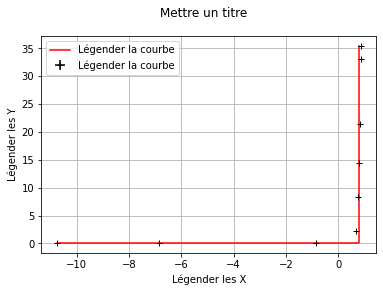

In [21]:
def estim_ud(u, i, E0, RP):
    imin = E0/RP  # LIGNE A MODIFIER
    u_verif = []  # Liste qui contiendra les valeurs acceptées.
    N = len(i)  # LIGNE A MODIFIER
    for j in range(N):
        if i[j] >= imin:
            u_verif.append([u[j]])  # LIGNE A MODIFIER
    u_verif = np.array(u_verif)  # Transformation en vecteur numpy pour calculer la moyenne simplement.
    print(u_verif)
    ud = np.mean(u_verif)
    return ud

"""Ecrire ci-dessous l'instruction qui va enregistrer dans la variable ud_estim l'estimation de ud
avec la méthode précdente"""
ud_estim = eval_ud(u, i)  # LIGNE A MODIFIER
ud_estim2 = eval_ud(u, i, 0.5, 100)  # LIGNE A MODIFIER

print(ud_estim)

"""Ajout du modèle sur le graphique.
"""
f,ax = plt.subplots()
f.suptitle("Mettre un titre")
ax.set_xlabel("Légender les X")
ax.set_ylabel("Légender les Y")
ax.errorbar(u, i, xerr=uu, yerr=ui, label="Légender la courbe", linestyle="", marker="+", color="black")
ax.plot([np.min(u), ud_estim, ud_estim], [0, 0, np.max(i)], label="Légender la courbe", linestyle="-",color="red")
ax.plot([np.min(u), ud_estim, ud_estim], [0, 0, np.max(i)], label="Légender la courbe", linestyle="-",color="red")

ax.grid()
ax.legend()
plt.show()


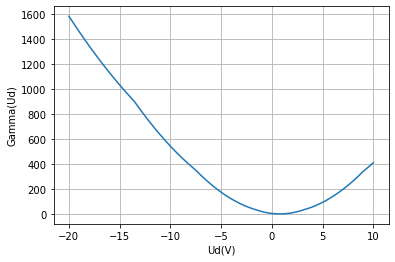

In [19]:
def gamma_ud(u, i, ud):
    n = len(u)
    ds = 0
    for j in range(n):
        d = min(abs(u[j]-ud), i[j])
        ds = ds + d ** 2
    return ds

ud_test = np.linspace(-20, 10, 1000)
gamma_test = np.array([gamma_ud(u, i, x) for x in ud_test])

f, ax =  plt.subplots()
ax.set_xlabel("Ud(V)")
ax.set_ylabel("Gamma(Ud)")
ax.plot(ud_test, gamma_test)
ax.grid()
plt.show()